# DESY Voltage scan

In [1]:
from numpy import *
 
import convert
from plotting.draw import *  # noqa
import src.bins as bins  # noqa
from src.dut_analysis import DUTAnalysis, Analysis
from src.batch_analysis import BatchAnalysis
from src.run import load_nrs
from src.scan import Ensemble, Scan, VScan, TScan
from utility.utils import *  # noqa
from functools import partial

Welcome to JupyROOT 6.26/10


In [2]:
run = 485
verbose=0
test=0
testcampaign='201912'
batch='v1'
dut=0
do_convert=0
remove_meta=0
runplan=None
scan = 'v-b6d'

In [3]:
if runplan is not None:
    from src.spreadsheet import make
    make(runplan)
    exit(2)

ensembles = load_json(Ensemble.FilePath)

print(ensembles)

if scan in ensembles:
    s = VScan if 'v-' in scan else TScan if 't-' in scan else Scan
    z = s(scan, verbose, test)

else:
    ana = Analysis(testcampaign)
    runs = load_nrs(ana.BeamTest.Path)
    is_batch = not (run in runs and batch is None)
    dut_ana = partial(BatchAnalysis, choose(batch, run)) if is_batch else partial(DUTAnalysis, run)
    dut_ana = partial(dut_ana, dut, testcampaign)

    if is_batch:
        bc = convert.BatchConvert(dut_ana.args[0], dut_ana.args[-1], verbose=False, force=False)
        if do_convert:
            remove_file(bc.Batch.FileName)
            bc.remove_aux_files()
        if not bc.Batch.FileName.exists() and not test:
            bc.run()

    if remove_meta:
        z = dut_ana(verbose=False, test=True)
        z.remove_metadata()

    if do_convert and not is_batch:
        z = dut_ana(verbose=False, test=True)
        z.remove_file()
        z.Converter.remove_aux_files()

    z = dut_ana(verbose=verbose, test=test)

{'v-b6': {'dut': 'II6-B6', '201810': ['1f', '1b', '1c', '1d', '1e']}, 'v-a2': {'dut': 'II6-A2', '201810': ['2a', '2b', '2c', '2d', '2e']}, 'test': {'dut': 'II6-B6', '201810': ['23d']}, 't-b6': {'dut': 'II6-B6', '201912': [17, 24, 25, 26]}, 'v-b6d': {'dut': 'II6-B6', '201912': [4, 7, 8, 10, 12, 17]}}

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 4 (Dec 2019), 2.50M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 7 (Dec 2019), 6.20M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 8 (Dec 2019), 2.70M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 10 (Dec 2019), 2.50M ev |
~~~~~~~~

In [4]:
def dc(): get_last_canvas().Draw()

In [5]:
z?

Type:            VScan
String form:     v-b6d
File:            ~/software/HighResAnalysis/src/scan.py
Docstring:       <no docstring>
Class docstring: Base class defining actions on several runs or batches


In [6]:
suf = f'{z.DUT.Name}-{z.__class__.__name__}-{z.Anas[0].BeamTest.Location}'.lower().replace('ii6-', '')
suf

'b6-vscan-desy'

## Currents versus the bias voltage

INFO:     16:11:39 --> saving plot: cur-b6-vscan-desy

INFO:     16:11:39 --> wrote file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6d/cur-b6-vscan-desy.html
INFO:     16:11:39 --> https://diamond.ethz.ch/high-rate/content/duts/II6-B6/v-b6d/cur-b6-vscan-desy.html


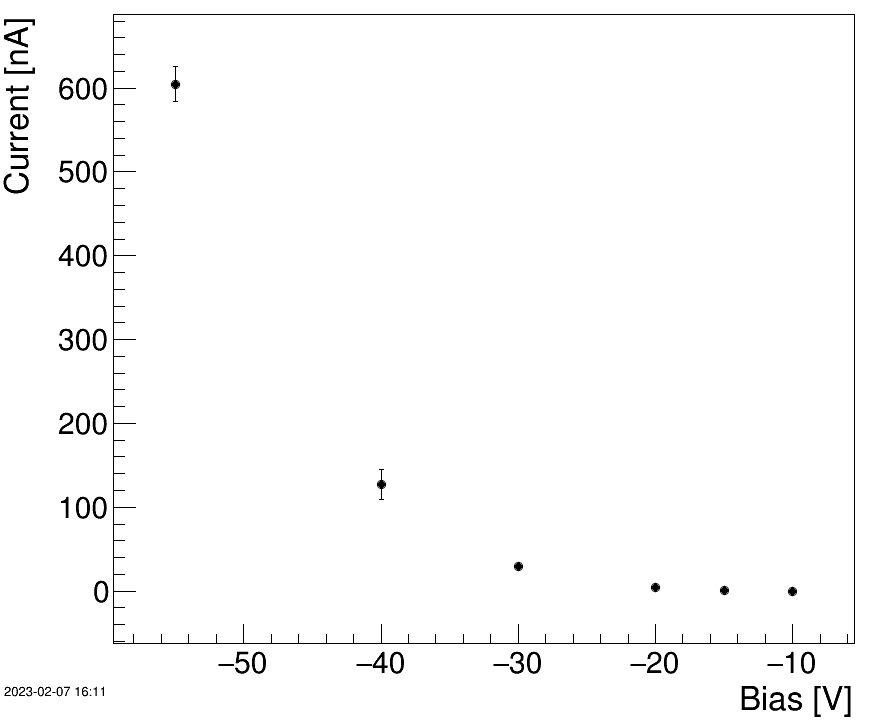

In [7]:
z.draw_current(fn=f'cur-{suf}')
dc()

## Efficiency versus the Bias voltage

INFO:     16:11:40 --> saving plot: e-b6-vscan-desy

INFO:     16:11:40 --> wrote file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6d/e-b6-vscan-desy.html
INFO:     16:11:40 --> https://diamond.ethz.ch/high-rate/content/duts/II6-B6/v-b6d/e-b6-vscan-desy.html


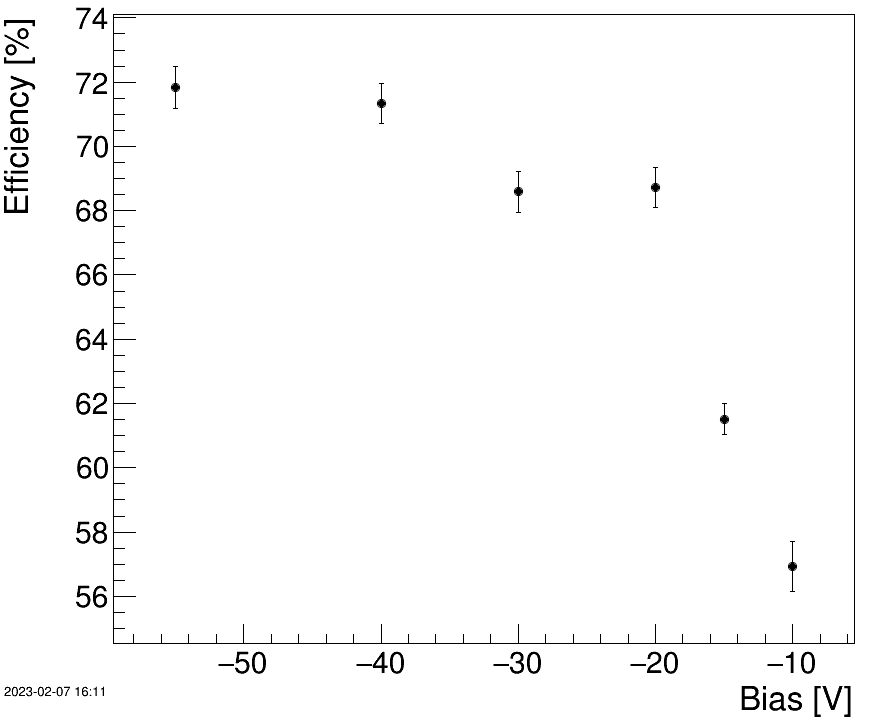

In [8]:
z.draw_efficiency(fn=f'e-{suf}')
dc()

## Average pulse height versus the bias voltage

INFO:     16:11:40 --> saving plot: ph-b6-vscan-desy

INFO:     16:11:40 --> wrote file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6d/ph-b6-vscan-desy.html
INFO:     16:11:40 --> https://diamond.ethz.ch/high-rate/content/duts/II6-B6/v-b6d/ph-b6-vscan-desy.html


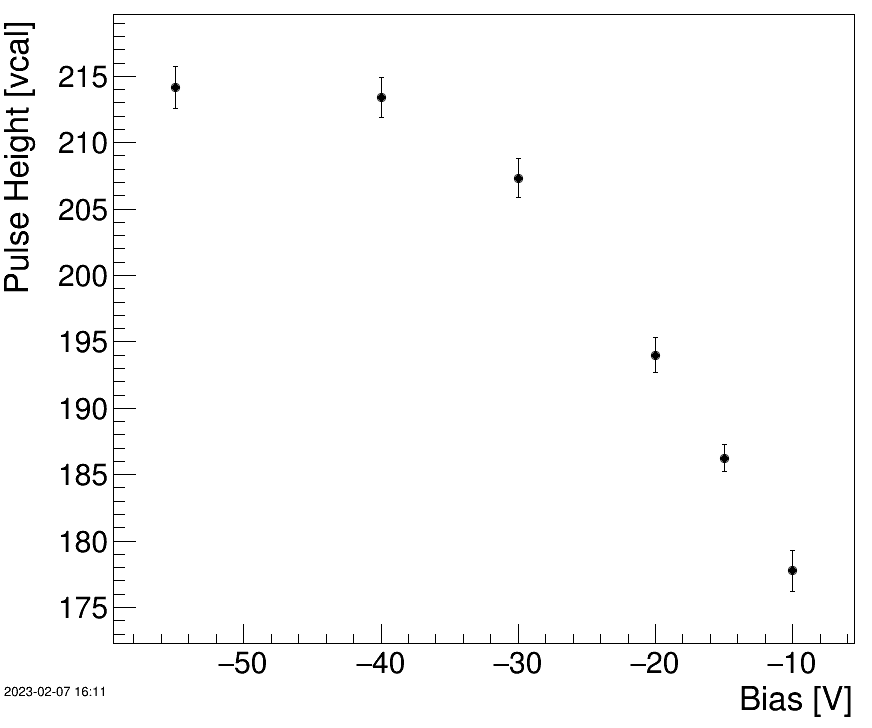

In [9]:
z.draw_pulse_height(fn=f'ph-{suf}')
dc()

## Pulse Height Distributions versus Voltage

INFO:     16:11:40 --> saving plot: PhDists

INFO:     16:11:41 --> wrote file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6d/PhDists.html
INFO:     16:11:41 --> https://diamond.ethz.ch/high-rate/content/duts/II6-B6/v-b6d/PhDists.html


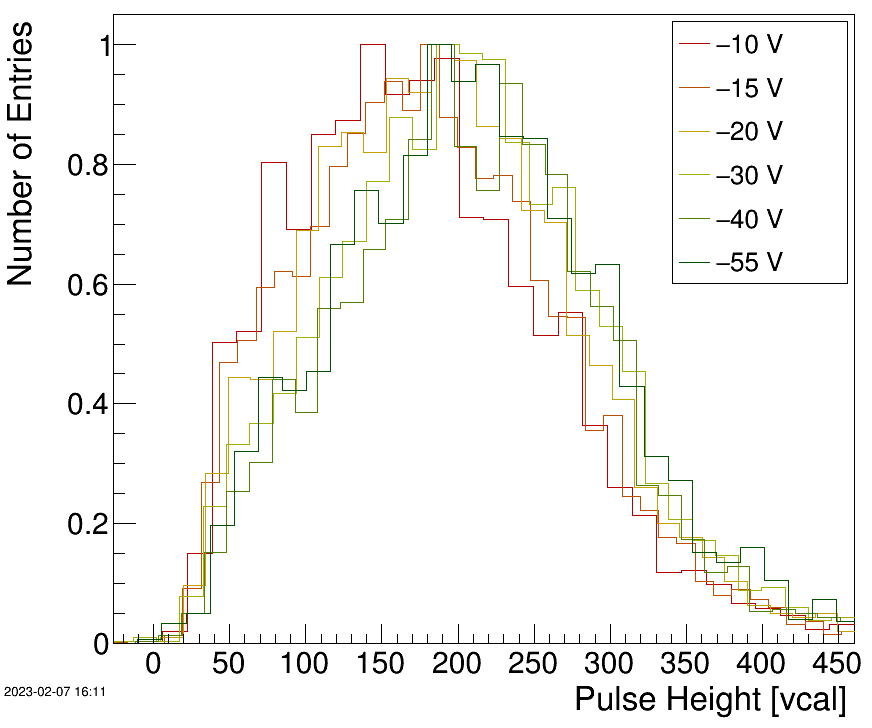

In [10]:
z.draw_ph_dists()
dc()

## Adding a list of cuts to a scan

First create a list of cuts by looping over the analyses and adding the cut with analysis.Cut.cut_function(params)

In [11]:
z.Anas # list of analyses

[DUT ANALYSIS of II6-B6, run 4 (Dec 2019), 2.54M ev,
 DUT ANALYSIS of II6-B6, run 7 (Dec 2019), 6.24M ev,
 DUT ANALYSIS of II6-B6, run 8 (Dec 2019), 2.76M ev,
 DUT ANALYSIS of II6-B6, run 10 (Dec 2019), 2.51M ev,
 DUT ANALYSIS of II6-B6, run 12 (Dec 2019), 2.52M ev,
 DUT ANALYSIS of II6-B6, run 17 (Dec 2019), 2.38M ev]

In [13]:
bias_col_cut = [ana.Cut.add(ana.Cut.bias_cols(7)) for ana in z.Anas]

Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:00 187.13  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:00 103.57  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:00 167.34  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:00 176.13  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Then create a list histograms by scanning over the cuts and analyses in z.Anas

In [14]:
dkw={}
hl= [ana.draw_signal_distribution(save=False, cut=cut, **rm_key(dkw, 'save')) for ana, cut in zip(z.Anas, bias_col_cut)]

Finally pass the list of histograms to z.Draw.stack

INFO:     16:12:31 --> saving plot: PhDists

INFO:     16:12:31 --> wrote file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6d/PhDists.html
INFO:     16:12:31 --> https://diamond.ethz.ch/high-rate/content/duts/II6-B6/v-b6d/PhDists.html


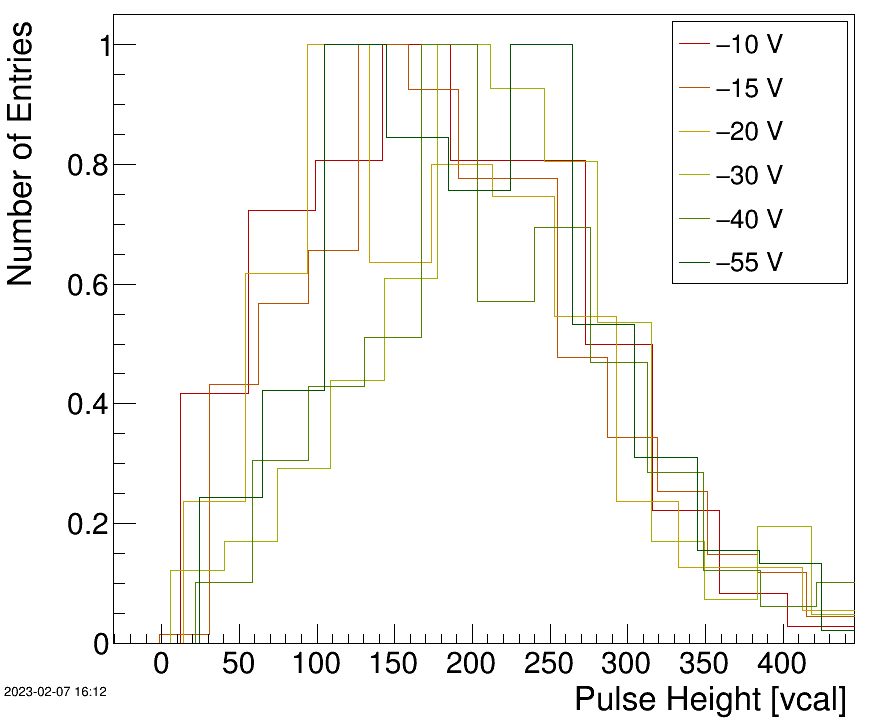

In [15]:
z.Draw.stack(hl, 'PHDists', z.x2str(), **prep_kw(dkw, scale=True, file_name='PhDists'))
dc()

In [ ]:
z.draw_r_ph_cols(r=5)
dc()

In [ ]:
x = z.values(DUTAnalysis.current)
y = z.values(DUTAnalysis.eff)
z.Draw.graph(x,y, leg=z.legend())
dc()

In [ ]:
z.Draw.stack??